# Collect data from different UPPASD simulations

**Uppasd_tools** can collect data from different simulations in order to extract temperature or field dependence of physical quantities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from uppasd_tools import UppOut
from uppasd_tools.collect import collect_averages, collect_cumulants, collect_energies

We shall use example of [bcc Iron simulated at different temperatures](data/bcc_thermal/) in the range from 20 to 1600 K with step 20 K. 
At each temperature we run Monte Carlo simulation using UppASD. The data folder also contains original input files and bash scripts used to submit the simulations.

The function implemented in uppasd_tools.collect aggregate data from different simulations saved in distinct folders. 
- The names of the folders have to follow certain structure (name_template).
- The functions aggregate data from given output file by avaraging across given range of rows.
- As a default option in averages all the rows in the output file.
- The functions return pandas DataFrame with temperature dependence of the averaged quantities.

Initially, we define the path to the main data directory, which contains subdirectories with different simulation results.

In [2]:
# Define the path to the data directory
path = Path("../data/bccFe_thermal")

# Define parameters for data collection
Params = {
    "name_template": "bccFe_temp_T{T}",
    "simid": "bccFe_T_"
}

# Collect data
df_aver = collect_averages(path, **Params)   # Collect data from averages.simid.out files
df_cumu = collect_cumulants(path, **Params)  # Collect data from cumulants.simid.out files

collect_averages:   0%|          | 0/80 [00:00<?, ?it/s]

collect_cumulants:   0%|          | 0/80 [00:00<?, ?it/s]

`df_aver` and `df_cumu` contain **temperature dependence** of given physical quantities averaged across the uppasd output files.

In [3]:
df_aver.head()

,T,Mx,My,Mz,M,M_std
0,20,-1.448135,-0.615761,0.834464,2.213122,0.000600
1,40,1.289157,0.037338,-0.167964,2.195993,0.001263
2,60,-1.032372,-0.597365,-0.070698,2.178594,0.001885
3,80,0.178827,-1.257176,-1.286104,2.161135,0.002639
4,100,0.187162,0.998697,0.414694,2.143724,0.003213


In [4]:
df_cumu.head()

,T,M,M2,M4,Binder,chi,Cv,E,E_exch,E_lsf
0,20,2.213106,4.897838,23.988831,0.666667,0.000023,1.042487,-12.282807,-12.282807,0.0
1,40,2.195986,4.822358,23.255178,0.666666,0.000051,1.115774,-12.155206,-12.155206,0.0
2,60,2.178571,4.746178,22.526306,0.666665,0.000079,1.124160,-12.026789,-12.026789,0.0
3,80,2.161073,4.670247,21.811390,0.666664,0.000111,1.103176,-11.898025,-11.898025,0.0
4,100,2.143738,4.595629,21.120092,0.666662,0.000138,1.121295,-11.768506,-11.768506,0.0


We can plot desired temperature dependences.

<Axes: xlabel='T'>

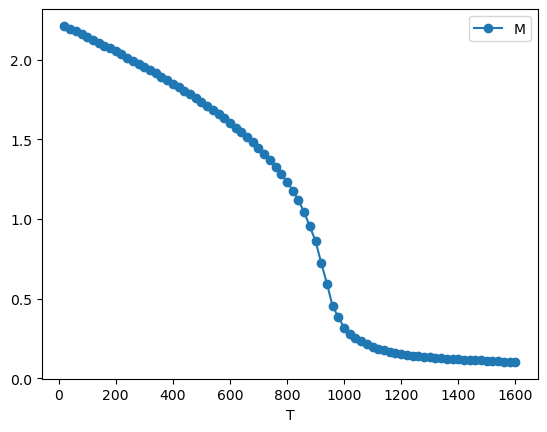

In [5]:
# Plot total magnetization vs temperature
df_aver.plot(x="T", y="M", marker="o")

<Axes: xlabel='T'>

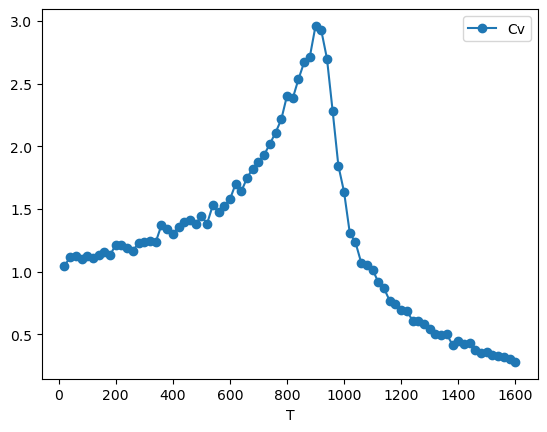

In [6]:
# Plot specific heat vs temperature
df_cumu.plot(x="T", y="Cv", marker="o")

<Axes: xlabel='T'>

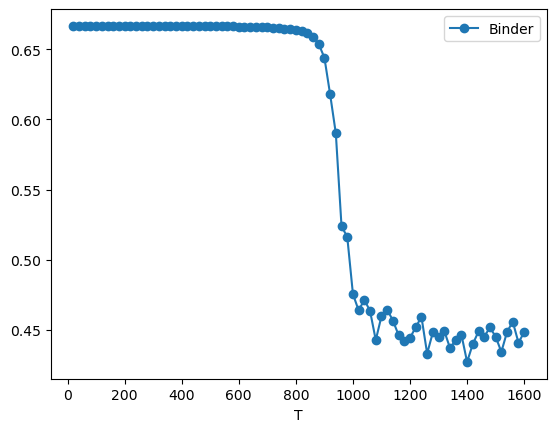

In [7]:
# Plot Binder cumulant vs temperature
df_cumu.plot(x="T", y="Binder", marker="o")

## Notes

- If your structure contains more atom types and you output also `projavgs.simid.out` or `projcumulants.simid.out`, 
you can also use functions `collect_projavgs()` and `collect_projcumulants()`. These functions return list of pandas DataFrames containing dependences for different atom_types.